In [132]:
!pip install beautifulsoup4==4.12.3
!pip install pandas==2.2.2
!pip install seaborn==0.13.2
!pip install scikit-learn==1.5.1
!pip install requests==2.32.3
!pip install nltk==3.8.1


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached regex-2024.5.15-cp312-cp312-win_amd64.whl.metadata (41 kB)
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ------- -------------------------------- 10.2/57.6 kB ? eta -:--:--
     ------- -------------------------------- 10.2/57.6 kB ? eta -:--:--
     -------------------------------------- 57.6/57.6 kB 606.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ----- ---------------------------------- 0.2/1.5 MB 4.0 MB/s eta 0:00:01
   ---------- ----------------------------- 0.4/1.5 MB 4.1 MB/s eta 0:00:01
   ----------------- ---------------------- 0.7/1.5 MB 4.8 MB/s eta 0:00:01
   -------------------------- ------------- 1.0/1.5 MB 5.2 MB/s eta 0:00:01
   --------------------------------- ------ 1.3/1.5 MB 5.4 MB/s eta 0:00:01
   ---------------------------------------  1.5/1.5 MB 5.1 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 5.1 MB/s eta 0:00:00
Using cached regex-2024.5.1


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
file_path = 'web_crawl/IMDb Top 250 Movies.html'

# Read the HTML file contents
with open(file_path, 'r', encoding='utf-8') as file:
    html_content = file.read()


In [3]:
from bs4 import BeautifulSoup

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Find all list items with the specific class
list_items = soup.find_all('li', class_='ipc-metadata-list-summary-item')

# Javascript equivalent:
# document.querySelectorAll("li.ipc-metadata-list-summary-item")

# Function to parse a single list item
def parse_movie_item(item):
    # Movie title
    title_tag = item.find('h3', class_='ipc-title__text')
    if title_tag:
        movie_title = title_tag.text.strip().split('. ', 1)[-1]
    else:
        movie_title = None

    # Movie link
    link_tag = item.find('a', class_='ipc-lockup-overlay ipc-focusable')
    movie_link = link_tag['href'] if link_tag else None
    if movie_link and not movie_link.startswith('http'):
        movie_link = 'https://www.imdb.com' + movie_link

    # Release date, runtime, and movie rating
    metadata_items = item.find_all('span', class_='sc-b189961a-8 kLaxqf cli-title-metadata-item')
    release_date = metadata_items[0].text.strip() if len(metadata_items) > 0 else None
    runtime = metadata_items[1].text.strip() if len(metadata_items) > 1 else None
    movie_rating = metadata_items[2].text.strip() if len(metadata_items) > 2 else None

    # Movie star rating
    star_rating_tag = item.find('span', class_='ipc-rating-star--rating')
    movie_star_rating = star_rating_tag.text.strip() if star_rating_tag else None

    # Number of star ratings
    vote_count_tag = item.find('span', class_='ipc-rating-star--voteCount')
    if vote_count_tag:
        vote_count = vote_count_tag.get_text(strip=True).replace('(', '').replace(')', '').replace('M', ' million').replace('K', ' thousand')
    else:
        vote_count = None

    return {
        'movie_title': movie_title,
        'movie_link': movie_link,
        'release_date': release_date,
        'runtime': runtime,
        'movie_rating': movie_rating,
        'movie_star_rating': movie_star_rating,
        'vote_count': vote_count
    }


### Excercise

 - Iterate over each list item and parse the details
 - Call `parse_movie_item` for each item in `list_items`

In [4]:
# Solution

# movies = [parse_movie_item(item) for item in list_items]
movies = list(map(parse_movie_item, list_items))

In [5]:
# Output the parsed movie details
for movie in movies[:10]:
    print(movie)

{'movie_title': 'The Shawshank Redemption', 'movie_link': 'https://www.imdb.com/title/tt0111161/?ref_=chttp_i_1', 'release_date': '1994', 'runtime': '2h 22m', 'movie_rating': 'R', 'movie_star_rating': '9.3', 'vote_count': '2.9 million'}
{'movie_title': 'The Godfather', 'movie_link': 'https://www.imdb.com/title/tt0068646/?ref_=chttp_i_2', 'release_date': '1972', 'runtime': '2h 55m', 'movie_rating': 'R', 'movie_star_rating': '9.2', 'vote_count': '2 million'}
{'movie_title': 'The Dark Knight', 'movie_link': 'https://www.imdb.com/title/tt0468569/?ref_=chttp_i_3', 'release_date': '2008', 'runtime': '2h 32m', 'movie_rating': 'PG-13', 'movie_star_rating': '9.0', 'vote_count': '2.9 million'}
{'movie_title': 'The Godfather Part II', 'movie_link': 'https://www.imdb.com/title/tt0071562/?ref_=chttp_i_4', 'release_date': '1974', 'runtime': '3h 22m', 'movie_rating': 'R', 'movie_star_rating': '9.0', 'vote_count': '1.4 million'}
{'movie_title': '12 Angry Men', 'movie_link': 'https://www.imdb.com/title

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pandas DataFrame from the movies list
movies_df = pd.DataFrame(movies)
display(movies_df)
display(movies_df.dtypes)

,movie_title,movie_link,release_date,runtime,movie_rating,movie_star_rating,vote_count
0,The Shawshank Redemption,https://www.imdb.com/title/tt0111161/?ref_=cht...,1994,2h 22m,R,9.3,2.9 million
1,The Godfather,https://www.imdb.com/title/tt0068646/?ref_=cht...,1972,2h 55m,R,9.2,2 million
2,The Dark Knight,https://www.imdb.com/title/tt0468569/?ref_=cht...,2008,2h 32m,PG-13,9.0,2.9 million
3,The Godfather Part II,https://www.imdb.com/title/tt0071562/?ref_=cht...,1974,3h 22m,R,9.0,1.4 million
4,12 Angry Men,https://www.imdb.com/title/tt0050083/?ref_=cht...,1957,1h 36m,Approved,9.0,875 thousand
...,...,...,...,...,...,...,...
245,It Happened One Night,https://www.imdb.com/title/tt0025316/?ref_=cht...,1934,1h 45m,Approved,8.1,113 thousand
246,Aladdin,https://www.imdb.com/title/tt0103639/?ref_=cht...,1992,1h 30m,G,8.0,472 thousand
247,Drishyam,https://www.imdb.com/title/tt4430212/?ref_=cht...,2015,2h 43m,Not Rated,8.2,96 thousand
248,Andhadhun,https://www.imdb.com/title/tt8108198/?ref_=cht...,2018,2h 19m,Not Rated,8.2,104 thousand


movie_title          object
movie_link           object
release_date         object
runtime              object
movie_rating         object
movie_star_rating    object
vote_count           object
dtype: object

In [7]:
# Convert the vote_count to a numeric value
movies_df['vote_count'] = movies_df['vote_count'].str.replace(' million', 'e6').str.replace(' thousand', 'e3')
movies_df['vote_count'] = movies_df['vote_count'].apply(pd.to_numeric, errors='coerce')
movies_df['movie_star_rating'] = movies_df['movie_star_rating'].apply(pd.to_numeric, errors='coerce')
movies_df['release_date'] = movies_df['release_date'].apply(pd.to_numeric, errors='coerce')
# Convert the runtime to minutes
def runtime_to_minutes(runtime):
    if pd.isna(runtime):
        return None
    time_parts = runtime.split()
    minutes = 0
    for part in time_parts:
        if 'h' in part:
            minutes += int(part.replace('h', '').strip()) * 60
        elif 'm' in part:
            minutes += int(part.replace('m', '').strip())
    return minutes

movies_df['runtime_minutes'] = movies_df['runtime'].apply(runtime_to_minutes)

display(movies_df)
display(movies_df.dtypes)

,movie_title,movie_link,release_date,runtime,movie_rating,movie_star_rating,vote_count,runtime_minutes
0,The Shawshank Redemption,https://www.imdb.com/title/tt0111161/?ref_=cht...,1994,2h 22m,R,9.3,2900000.0,142
1,The Godfather,https://www.imdb.com/title/tt0068646/?ref_=cht...,1972,2h 55m,R,9.2,2000000.0,175
2,The Dark Knight,https://www.imdb.com/title/tt0468569/?ref_=cht...,2008,2h 32m,PG-13,9.0,2900000.0,152
3,The Godfather Part II,https://www.imdb.com/title/tt0071562/?ref_=cht...,1974,3h 22m,R,9.0,1400000.0,202
4,12 Angry Men,https://www.imdb.com/title/tt0050083/?ref_=cht...,1957,1h 36m,Approved,9.0,875000.0,96
...,...,...,...,...,...,...,...,...
245,It Happened One Night,https://www.imdb.com/title/tt0025316/?ref_=cht...,1934,1h 45m,Approved,8.1,113000.0,105
246,Aladdin,https://www.imdb.com/title/tt0103639/?ref_=cht...,1992,1h 30m,G,8.0,472000.0,90
247,Drishyam,https://www.imdb.com/title/tt4430212/?ref_=cht...,2015,2h 43m,Not Rated,8.2,96000.0,163
248,Andhadhun,https://www.imdb.com/title/tt8108198/?ref_=cht...,2018,2h 19m,Not Rated,8.2,104000.0,139


movie_title           object
movie_link            object
release_date           int64
runtime               object
movie_rating          object
movie_star_rating    float64
vote_count           float64
runtime_minutes        int64
dtype: object

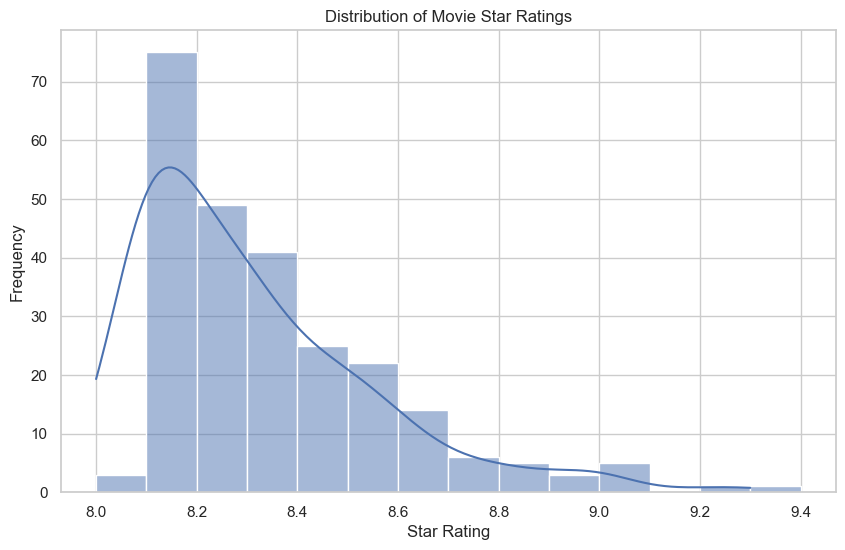

[9.3 9.2 9.  8.9 8.8 8.7 8.6 8.5 8.4 8.3 8.2 8.1 8. ]


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Convert movie_star_rating to float and drop NaN values
ratings = movies_df['movie_star_rating'].dropna().astype(float)

# Define the bin width and edges
bin_width = 0.1
bin_edges = np.arange(ratings.min(), ratings.max() + bin_width, bin_width)

# Plot the distribution of movie star ratings
plt.figure(figsize=(10, 6))
sns.histplot(ratings, bins=bin_edges, kde=True)
plt.title('Distribution of Movie Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Frequency')
plt.show()

print(movies_df['movie_star_rating'].unique())


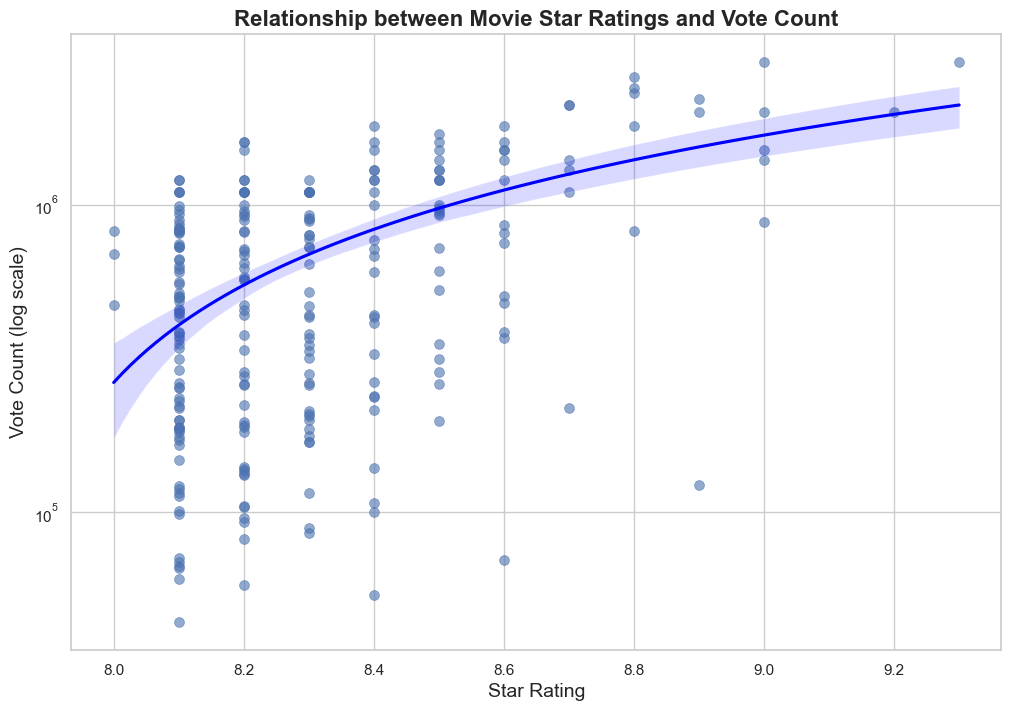

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and axis with a specific size
plt.figure(figsize=(12, 8))

# Scatter plot with jitter for better visualization of overlapping points
sns.scatterplot(data=movies_df, x='movie_star_rating', y='vote_count', alpha=0.6, edgecolor=None, s=50)

# Add a regression line (optional, if you want to show the trend)
sns.regplot(data=movies_df, x='movie_star_rating', y='vote_count', scatter=False, logx=False, color='blue')

# Set the y-axis to logarithmic scale
plt.yscale('log')

# Adding titles and labels
plt.title('Relationship between Movie Star Ratings and Vote Count', fontsize=16, fontweight='bold')
plt.xlabel('Star Rating', fontsize=14)
plt.ylabel('Vote Count (log scale)', fontsize=14)

# Show the plot
plt.show()


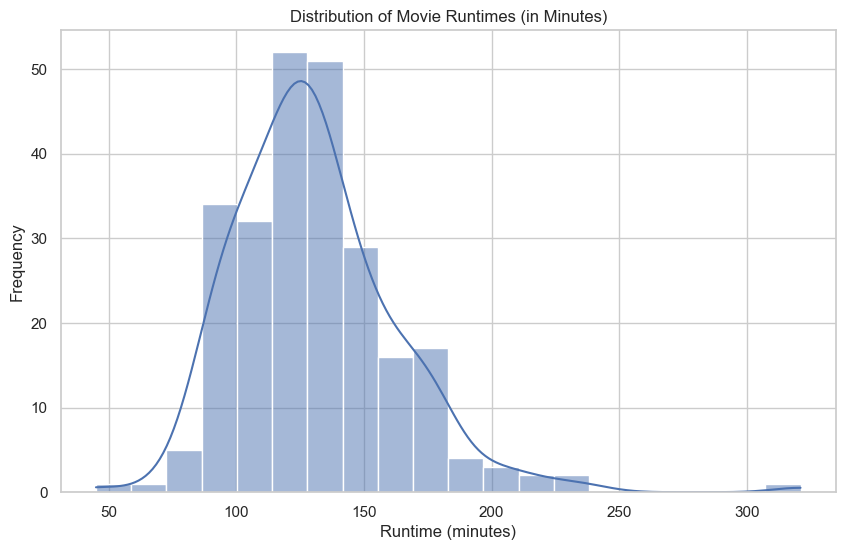

In [10]:
# Plot the distribution of runtimes in minutes
plt.figure(figsize=(10, 6))
sns.histplot(movies_df['runtime_minutes'].dropna(), bins=20, kde=True)
plt.title('Distribution of Movie Runtimes (in Minutes)')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.show()

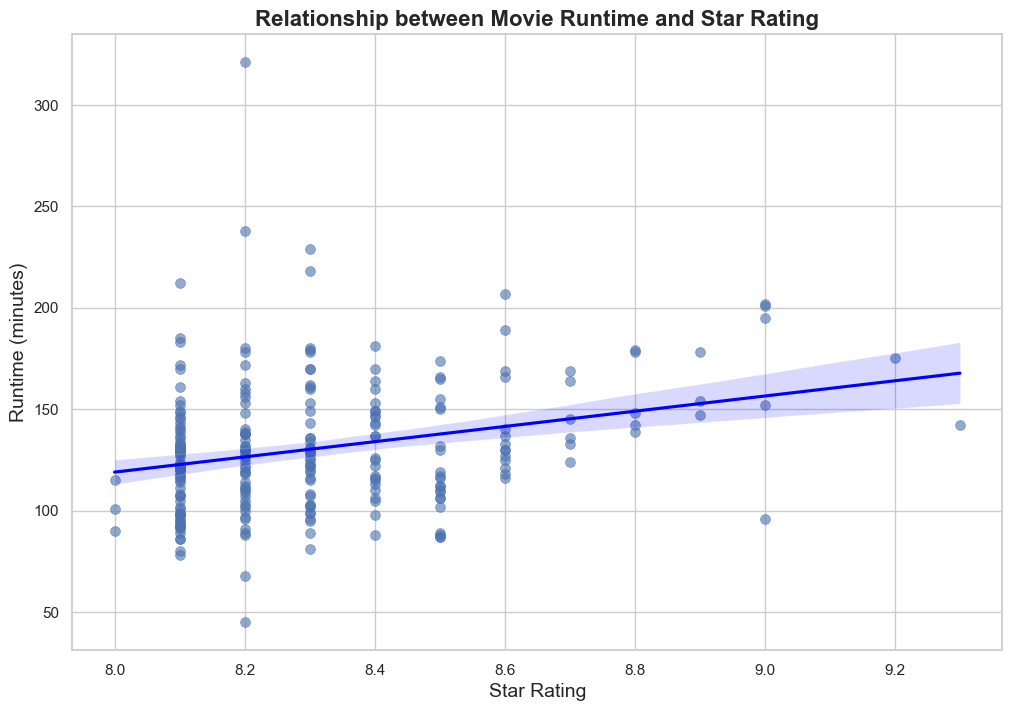

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and axis with a specific size
plt.figure(figsize=(12, 8))

# Scatter plot with jitter for better visualization of overlapping points
sns.scatterplot(data=movies_df, x='movie_star_rating', y='runtime_minutes', alpha=0.6, edgecolor=None, s=50)

# Add a regression line (optional, if you want to show the trend)
sns.regplot(data=movies_df, x='movie_star_rating', y='runtime_minutes', scatter=False, logx=False, color='blue')

# Adding titles and labels
plt.title('Relationship between Movie Runtime and Star Rating', fontsize=16, fontweight='bold')
plt.xlabel('Star Rating', fontsize=14)
plt.ylabel('Runtime (minutes)', fontsize=14)

# Show the plot
plt.show()


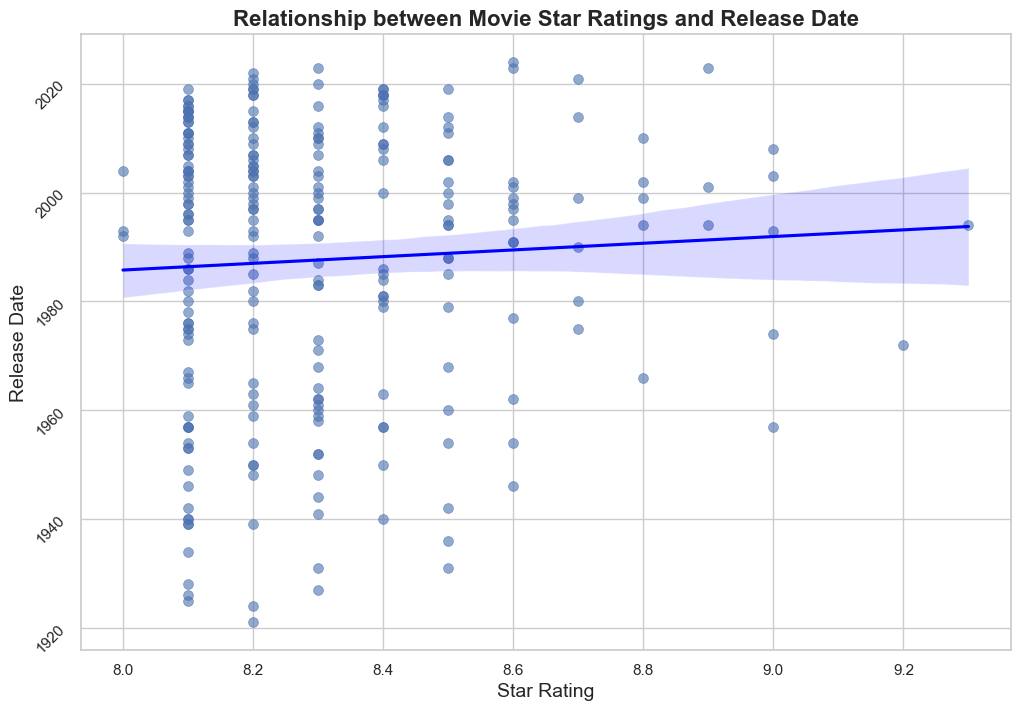

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and axis with a specific size
plt.figure(figsize=(12, 8))

# Scatter plot with jitter for better visualization of overlapping points
sns.scatterplot(data=movies_df, x='movie_star_rating', y='release_date', alpha=0.6, edgecolor=None, s=50)

# Add a regression line (optional, if you want to show the trend)
sns.regplot(data=movies_df, x='movie_star_rating', y='release_date', scatter=False, logx=False, color='blue')

# Adding titles and labels
plt.title('Relationship between Movie Star Ratings and Release Date', fontsize=16, fontweight='bold')
plt.xlabel('Star Rating', fontsize=14)
plt.ylabel('Release Date', fontsize=14)

# Rotate y-axis labels for better readability
plt.yticks(rotation=45)

# Show the plot
plt.show()



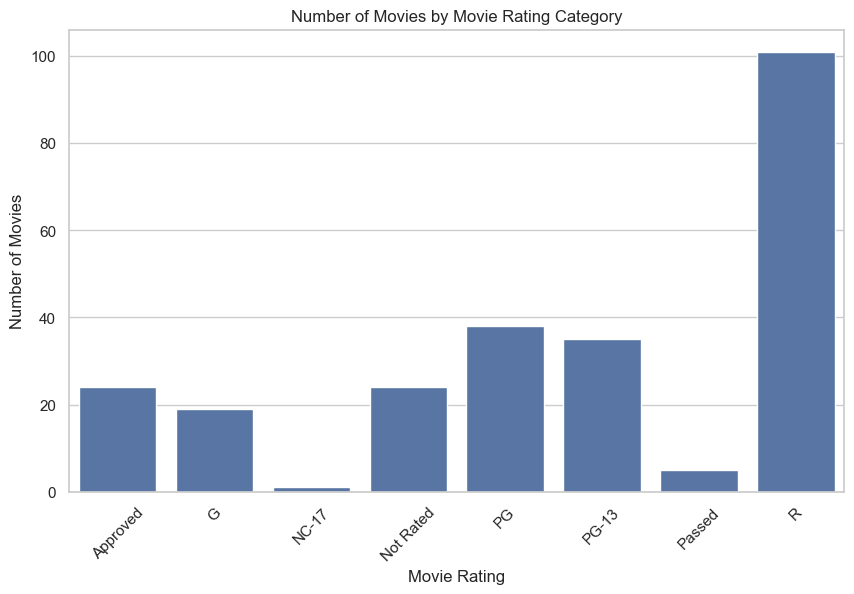

In [13]:
# Plot the bar chart histogram of the number of movies based on each movie_rating category
plt.figure(figsize=(10, 6))

sns.countplot(data=movies_df, x='movie_rating', order=sorted(movies_df['movie_rating'].dropna().unique()))
plt.title('Number of Movies by Movie Rating Category')
plt.xlabel('Movie Rating')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()


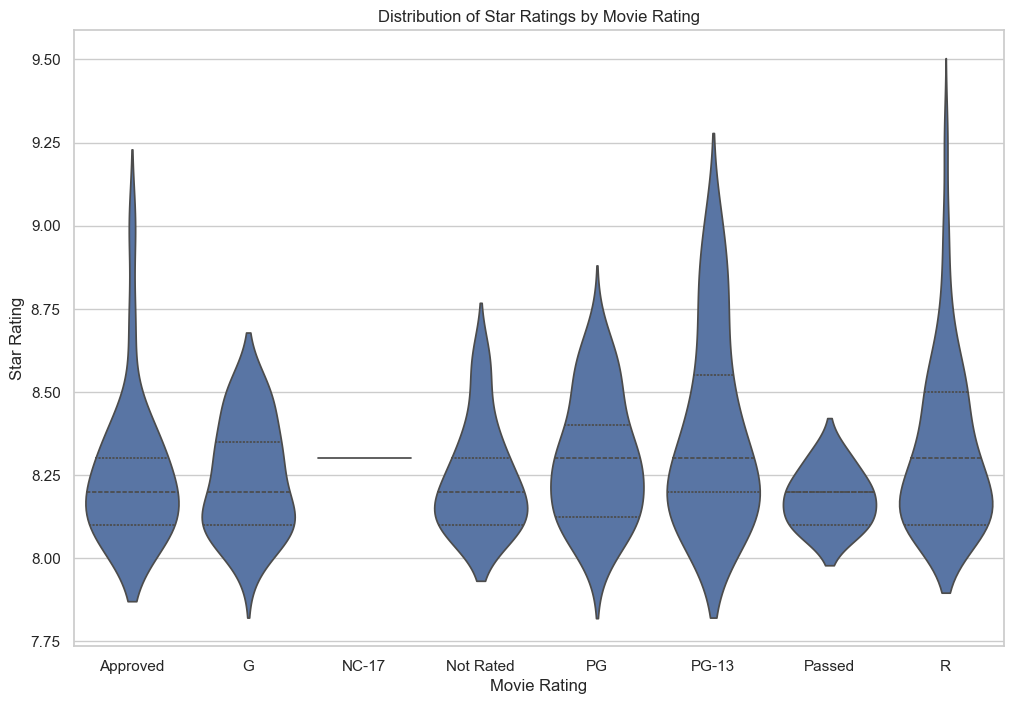

In [14]:
# Plot the relationship between movie star ratings and movie rating using a violin plot
plt.figure(figsize=(12, 8))
violin_plot = sns.violinplot(
    data=movies_df,
    x='movie_rating',
    y='movie_star_rating',
    density_norm='width',
    inner='quartile',
    order=sorted(movies_df['movie_rating'].dropna().unique())
)

plt.title('Distribution of Star Ratings by Movie Rating')
plt.xlabel('Movie Rating')
plt.ylabel('Star Rating')
plt.show()


## scikit-learn Machine Learning in Python

The [sklearn](https://scikit-learn.org/stable/) module, also known as scikit-learn, is a powerful and widely-used Python library for machine learning. It provides simple and efficient tools for data mining and data analysis, making it accessible for both beginners and experienced practitioners. The library offers various algorithms for classification, regression, clustering, and dimensionality reduction, along with utilities for model selection, preprocessing, and evaluation.

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


# Convert DataFrame to the required format
df = pd.DataFrame(movies_df, copy=True)

# Encode Categorical Target Variable: Convert `movie_rating` to numerical values
label_encoder = LabelEncoder()
df['movie_rating_encoded'] = label_encoder.fit_transform(df['movie_rating'])

# Drop unnecessary columns
df.drop(columns=['movie_title', 'movie_link', 'movie_rating', 'runtime'], inplace=True)

# The DataFrame is sorted based on the release_date column to facilitate a temporal split of the data.
df = df.sort_values(by='release_date', ignore_index=True)
display(df)

# Define split point (e.g., use 2000 as the cut-off year)
split_year = 2010
df_train = df[df['release_date'] <= split_year]
df_test = df[df['release_date'] > split_year]

# Features and target variable
X_train = df_train.drop(columns=['movie_star_rating'])
y_train = df_train['movie_star_rating']
X_test = df_test.drop(columns=['movie_star_rating'])
y_test = df_test['movie_star_rating']

# Normalize the features to ensure that they have a mean of 0 and a standard deviation of 1.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

,release_date,movie_star_rating,vote_count,runtime_minutes,movie_rating_encoded
0,1921,8.2,136000.0,68,6
1,1924,8.2,58000.0,45,6
2,1925,8.1,119000.0,95,0
3,1926,8.1,99000.0,78,6
4,1927,8.3,187000.0,153,3
...,...,...,...,...,...
245,2022,8.2,717000.0,130,5
246,2023,8.9,123000.0,147,8
247,2023,8.6,387000.0,140,4
248,2023,8.3,771000.0,180,7


Mean Squared Error: 0.0362649399999997


In [16]:
# Predict ratings on the test set
y_pred = model.predict(X_test_scaled)

# Create a DataFrame to show test data points, predicted ratings, and actual ratings
test_results = X_test.copy()
test_results['Actual Rating'] = y_test.values
test_results['Predicted Rating'] = y_pred

# Add the movie title for better context (assuming the index of X_test corresponds to the original DataFrame)
test_results['Movie Title'] = movies_df.loc[X_test.index, 'movie_title']

# Display the relevant columns
test_results = test_results[['Movie Title', 'Actual Rating', 'Predicted Rating']]

# Print the results
display(test_results)

,Movie Title,Actual Rating,Predicted Rating
200,Jaws,8.1,8.286
201,How to Train Your Dragon,8.5,8.197
202,Ratatouille,8.1,8.292
203,Mary and Max,8.1,8.247
204,The Third Man,8.3,8.211
205,The Wages of Fear,8.2,8.275
206,Wild Strawberries,8.3,8.177
207,Mr. Smith Goes to Washington,8.4,8.636
208,Ford v Ferrari,8.5,8.361
209,Tokyo Story,8.2,8.229


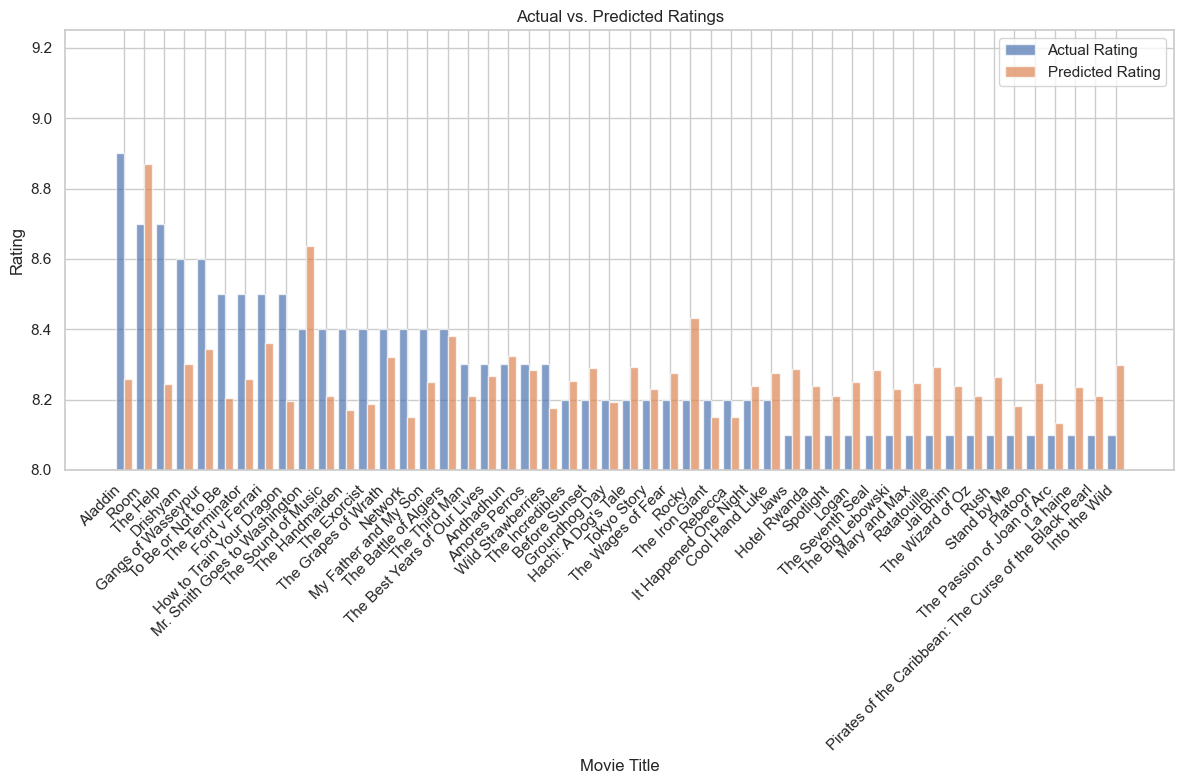

In [17]:
import matplotlib.pyplot as plt

# Sort the DataFrame by 'Actual Rating'
test_results_sorted = test_results.sort_values(by='Actual Rating', ascending=False)

# Plotting the results
plt.figure(figsize=(12, 8))

# Bar plot for Actual Ratings vs. Predicted Ratings
x = range(len(test_results_sorted))
plt.bar(x, test_results_sorted['Actual Rating'], width=0.4, label='Actual Rating', align='center', alpha=0.7)
plt.bar([i + 0.4 for i in x], test_results_sorted['Predicted Rating'], width=0.4, label='Predicted Rating', align='center', alpha=0.7)

# Adding labels and title
plt.xlabel('Movie Title')
plt.ylabel('Rating')
plt.title('Actual vs. Predicted Ratings')
plt.xticks([i + 0.2 for i in x], test_results_sorted['Movie Title'], rotation=45, ha='right')
plt.ylim(8, 9.25)

# Adding legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


# Web scraping

In order to create a corpus of text to analyze, we will see how to scrape the top 25 comments from each imdb top 250 movie. To do this, we will follow these steps:

 - Look at an example of how scraping can be done. In order to avoid overloading imdb's servers, the pages have already been loaded to the `web_crawl/movies` directory.
 - We will start a local webserver to serve the preloaded files.
 - Using the webserver, we will load each movie page and parse the reviews from the page.
 - The reviews are parsed into a dictionary, which is added to a list of reviews. The list of reviews is then converted to a `DataFrame` for further analysis.

In [18]:
import pandas as pd
import requests
import time
import random
from bs4 import BeautifulSoup
import re
import os

import re
from urllib.parse import urlparse, urlunparse

## Example for scraping imdb movie reviews based on movie titles

In [19]:
def convert_to_reviews_url(original_url):
    # Parse the original URL
    # The original URL is in the following format: https://www.imdb.com/title/tt0111161/?ref_=cht...
    # We need the id of the movie: tt0111161
    parsed_url = urlparse(original_url)
    
    # Extract the movie ID using regex
    # Capturing group for (tt\d+) will capture the exact string we are looking for: tt0111161
    # Tools for working with regex: chatgpt, https://regex101.com/, https://regexr.com/
    match = re.search(r'/title/(tt\d+)/', parsed_url.path)
    if not match:
        raise ValueError("Invalid IMDb URL or movie ID not found.")

    # Group 0 is the exact match: /title/tt0111161/
    # Group 1 is the first capturing group: tt0111161
    movie_id = match.group(1)
    
    # Reconstruct the new URL with '/reviews'
    # https://www.imdb.com/title/tt0111161/reviews
    new_path = f"/title/{movie_id}/reviews"
    new_url = urlunparse((
        parsed_url.scheme,
        parsed_url.netloc,
        new_path,
        parsed_url.params,
        parsed_url.query,
        parsed_url.fragment
    ))
    
    return new_url

def save_movie_page(contents, title):
    # Sanitize the title to make it a valid filename
    sanitized_title = re.sub(r'[\/:*?"<>|]', '', title)  # Remove invalid characters

    # Define the file path
    file_path = os.path.join('web_crawl', 'movies', f'{sanitized_title}.html')

    # Create the directory if it does not exist
    os.makedirs(os.path.dirname(file_path), exist_ok=True)

    # Save the HTML content to the file
    with open(file_path, 'wb') as file:
        file.write(contents)
    
    return sanitized_title

def load_movie_details_page(url, title):
    # Send a GET request to the URL
    headers = {
        "accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7",
        "accept-language": "en-US,en;q=0.9",
        "cache-control": "max-age=0",
        "priority": "u=0, i",
        "sec-ch-ua": '"Not/A)Brand";v="8", "Chromium";v="126", "Google Chrome";v="126"',
        "sec-ch-ua-mobile": "?0",
        "sec-ch-ua-platform": '"Windows"',
        "sec-fetch-dest": "document",
        "sec-fetch-mode": "navigate",
        "sec-fetch-site": "same-origin",
        "sec-fetch-user": "?1",
        "upgrade-insecure-requests": "1",
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        return 
    else:
        return f'Failed to retrieve page {response.status_code}'


To do the actual scraping, we iterate over the movies dataframe and load the reviews of each movie. As this may put strain on the internet connection, when run by everybody, the iteration has a special stop condition added to stop after the first two movies.

In [20]:
# Iterate over the DataFrame and extract data
for index, row in movies_df.iterrows():
    print(row)
    title = row['movie_title']
    link = row['movie_link']
    print(f'Fetching details for: {title} {link}')
    
    # Extract additional details from the IMDb page
    reviews_url = convert_to_reviews_url(link)
    page_contents = load_movie_details_page(reviews_url, title)
    # We do not want to overwrite the already saved reviews
    # save_movie_page(page_contents, title)
    
    # Print or store the extracted data
    print(f'Title: {title}', end="\t")

    # In order not to overload the imdb servers, we sleep for a rnadom amount of time.
    sleep_time = 3 + random.uniform(0, 5)
    print(f"Sleep: {sleep_time}")
    time.sleep(sleep_time)

    # Stop the iteration because we have already downloaded the movies.
    if index >= 1:
        print("Stop iteration because of testing phase")
        break

movie_title                                   The Shawshank Redemption
movie_link           https://www.imdb.com/title/tt0111161/?ref_=cht...
release_date                                                      1994
runtime                                                         2h 22m
movie_rating                                                         R
movie_star_rating                                                  9.3
vote_count                                                   2900000.0
runtime_minutes                                                    142
Name: 0, dtype: object
Fetching details for: The Shawshank Redemption https://www.imdb.com/title/tt0111161/?ref_=chttp_i_1
Title: The Shawshank Redemption	Sleep: 6.965504866242047
movie_title                                              The Godfather
movie_link           https://www.imdb.com/title/tt0068646/?ref_=cht...
release_date                                                      1972
runtime                                

In [21]:
# Open python terminal (WinPython Command Prompt.exe)
# Go to movies directory
# cd C:\projects\2024_07_19_SZT_PYTHON_H\web_crawl\movies
# Run http server with: 
# python -m http.server 8000 --bind 0.0.0.0
# Open browser: http://localhost:8000/

In [22]:

def parse_reviews(html_content):
    # Parse the HTML content with BeautifulSoup
    soup = BeautifulSoup(html_content, 'html.parser')
    
    # Extract review information
    reviews = []
    
    for review_div in soup.select('div.lister-item.mode-detail.imdb-user-review'):
        rating = review_div.select_one('.rating-other-user-rating span')
        if rating:
            rating = rating.find(string=True).strip()
        review_title = review_div.select_one('.title').text.strip()
        review_date = review_div.select_one('.review-date').text.strip()
        spoiler_warning = review_div.select_one('.spoiler-warning') is not None
        review_text = review_div.select_one('.text').get_text(strip=True)
        
        # Extract helpful/unhelpful votes
        votes_text = review_div.select_one('.actions.text-muted').text
        helpful_votes = votes_text.split('out of')[0].strip().replace(',', '')
        total_votes = votes_text.split('out of')[1].split('found')[0].strip().replace(',', '')
        
        review = {
            'rating': rating,
            'review_title': review_title,
            'review_date': review_date,
            'spoilers': spoiler_warning,
            'review_text': review_text,
            'helpful_votes': helpful_votes,
            'total_votes': total_votes
        }
        reviews.append(review)
    
    return reviews


Single threaded loading

In [23]:
# Read file contents and pass it to parse_reviews
review_page_paths = "http://localhost:8000/"
all_reviews = []
for index, movie in movies_df.iterrows():
    title = re.sub(r'[\/:*?"<>|]', '', movie['movie_title'])  # Remove invalid characters

    url = f"{review_page_paths}{title}.html"
    print(f"{title}\t{url}")
    response = requests.get(url)
    if response.status_code == 200:
        movie_reviews = parse_reviews(response.content)

        # Add the movie's columns to the moview review
        for movie_review in movie_reviews:
            movie_review.update(movie)

        # Add the movie reviews to the common list
        all_reviews += movie_reviews
    else:
        print(f'Failed to retrieve page {response.status_code} {url}')
    

The Shawshank Redemption	http://localhost:8000/The Shawshank Redemption.html
The Godfather	http://localhost:8000/The Godfather.html
The Dark Knight	http://localhost:8000/The Dark Knight.html


KeyboardInterrupt: 

Multithreaded loading

In [24]:
import threading
import requests
import pandas as pd
import re

# Assuming movies_df is already defined and parse_reviews function is available
# Define a lock for thread-safe operations
lock = threading.Lock()

# Function to process a chunk of the DataFrame
def process_chunk(chunk, review_page_paths, all_reviews):
    local_reviews = []
    for index, movie in chunk.iterrows():
        title = re.sub(r'[\/:*?"<>|]', '', movie['movie_title'])  # Remove invalid characters
        url = f"{review_page_paths}{title}.html"
        print(f"{title}\t{url}")
        response = requests.get(url)
        if response.status_code == 200:
            movie_reviews = parse_reviews(response.content)
            # Add the movie's columns to the movie review
            for movie_review in movie_reviews:
                movie_review.update(movie)
            # Add the movie reviews to the local list
            local_reviews += movie_reviews
        else:
            print(f'Failed to retrieve page {response.status_code} {url}')
    # Safely update the global all_reviews list
    with lock:
        all_reviews.extend(local_reviews)


review_page_paths = "http://localhost:8000/"
all_reviews = []

# Determine the number of threads to use
num_threads = 20
chunks = np.array_split(movies_df, num_threads)

threads = []

# Create and start threads
for chunk in chunks:
    thread = threading.Thread(
        target=process_chunk,
        args=(chunk, review_page_paths, all_reviews),
        daemon=True
    )
    threads.append(thread)
    thread.start()

# Wait for all threads to complete
for thread in threads:
    thread.join()

print("All threads have completed.")
# all_reviews now contains all the reviews
print(f"Total reviews collected: {len(all_reviews)}")


C:\projects\2024_07_19_SZT_PYTHON_H\venv\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


The Shawshank Redemption	http://localhost:8000/The Shawshank Redemption.html
Inception	http://localhost:8000/Inception.html
The Green Mile	http://localhost:8000/The Green Mile.html
Léon The Professional	http://localhost:8000/Léon The Professional.html
Alien	http://localhost:8000/Alien.html
Witness for the Prosecution	http://localhost:8000/Witness for the Prosecution.html
Das Boot	http://localhost:8000/Das Boot.html
Toy Story 3	http://localhost:8000/Toy Story 3.html
Scarface	http://localhost:8000/Scarface.html
Die Hard	http://localhost:8000/Die Hard.html
The Wolf of Wall Street	http://localhost:8000/The Wolf of Wall Street.html
Jurassic Park	http://localhost:8000/Jurassic Park.html
The Great Escape	http://localhost:8000/The Great Escape.html
Inside Out	http://localhost:8000/Inside Out.html
Million Dollar Baby	http://localhost:8000/Million Dollar Baby.html
Dead Poets Society	http://localhost:8000/Dead Poets Society.html
Ratatouille	http://localhost:8000/Ratatouille.html
Logan	http://loca

In [28]:
import json

# Save all_reviews to a file
def save_reviews_to_file(all_reviews, filename='web_crawl/all_reviews.json'):
    with open(filename, 'w') as f:
        json.dump(all_reviews, f)
    print(f"Reviews saved to {filename}")

# Do not overwrite the saved reviews.
# save_reviews_to_file(all_reviews, filename)

Reviews saved to web_crawl/all_reviews.json


In [30]:
import json

# Load all_reviews from a file
def load_reviews_from_file(filename='web_crawl/all_reviews.json'):
    with open(filename, 'r') as f:
        all_reviews = json.load(f)
    return all_reviews

# Load the reviews
all_reviews = load_reviews_from_file()
print(f"Loaded {len(all_reviews)}")

Loaded 6230


In [32]:
all_reviews_df = pd.DataFrame(all_reviews)
display(all_reviews_df)
display(all_reviews_df.dtypes)

,rating,review_title,review_date,spoilers,review_text,helpful_votes,total_votes,movie_title,movie_link,release_date,runtime,movie_rating,movie_star_rating,vote_count,runtime_minutes
0,9,The 9/10 movie I'll never watch again.,17 June 2020,False,Personal Rating: 9/10This movie shattered me. ...,137,144,Dead Poets Society,https://www.imdb.com/title/tt0097165/?ref_=cht...,1989,2h 8m,PG,8.1,554000.0,128
1,9,Thank You Captain,12 August 2014,False,It was with a sad reason that I re watched Dea...,154,163,Dead Poets Society,https://www.imdb.com/title/tt0097165/?ref_=cht...,1989,2h 8m,PG,8.1,554000.0,128
2,9,Includes a short inspired poem. Your verse.,24 August 2014,True,Swim against the streamWhat this film did for ...,41,46,Dead Poets Society,https://www.imdb.com/title/tt0097165/?ref_=cht...,1989,2h 8m,PG,8.1,554000.0,128
3,10,A powerful antidote to conformism,22 August 2001,False,There are certain films that get under your sk...,1107,1159,Dead Poets Society,https://www.imdb.com/title/tt0097165/?ref_=cht...,1989,2h 8m,PG,8.1,554000.0,128
4,10,Seize the Day- One of the Greatest Movies Ever!,17 November 2008,False,Dead Poets Scoiety. I suppose if you were in H...,185,199,Dead Poets Society,https://www.imdb.com/title/tt0097165/?ref_=cht...,1989,2h 8m,PG,8.1,554000.0,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6225,10,A film any actor would just die to be in.,5 September 2016,True,The opening scene in this masterpiece from Ser...,19,22,Once Upon a Time in the West,https://www.imdb.com/title/tt0064116/?ref_=cht...,1968,2h 46m,PG-13,8.5,352000.0,166
6226,6,Loses focus many times and is WAYYY too long,11 May 2015,True,Considered by many as one of the greatest west...,11,21,Once Upon a Time in the West,https://www.imdb.com/title/tt0064116/?ref_=cht...,1968,2h 46m,PG-13,8.5,352000.0,166
6227,10,Once Upon a Time There Was Henry Fonda.,9 September 2016,True,Once Upon A Time in the West (1968): Dir: Serg...,15,17,Once Upon a Time in the West,https://www.imdb.com/title/tt0064116/?ref_=cht...,1968,2h 46m,PG-13,8.5,352000.0,166
6228,7,Leone falls in love with his style a little to...,27 July 2008,False,Leone's now iconic film stands out for two ver...,6,10,Once Upon a Time in the West,https://www.imdb.com/title/tt0064116/?ref_=cht...,1968,2h 46m,PG-13,8.5,352000.0,166


rating                object
review_title          object
review_date           object
spoilers                bool
review_text           object
helpful_votes         object
total_votes           object
movie_title           object
movie_link            object
release_date           int64
runtime               object
movie_rating          object
movie_star_rating    float64
vote_count           float64
runtime_minutes        int64
dtype: object

In [33]:
all_reviews_df['rating'] = pd.to_numeric(all_reviews_df['rating'], errors='coerce')

# Convert review_date to datetime
all_reviews_df['review_date'] = pd.to_datetime(all_reviews_df['review_date'], format='%d %B %Y', errors='coerce')

# Convert helpful_votes and total_votes to numeric (handling missing values if any)
all_reviews_df['helpful_votes'] = pd.to_numeric(all_reviews_df['helpful_votes'], errors='coerce')
all_reviews_df['total_votes'] = pd.to_numeric(all_reviews_df['total_votes'], errors='coerce')

display(all_reviews_df)
display(all_reviews_df.dtypes)


,rating,review_title,review_date,spoilers,review_text,helpful_votes,total_votes,movie_title,movie_link,release_date,runtime,movie_rating,movie_star_rating,vote_count,runtime_minutes
0,9.0,The 9/10 movie I'll never watch again.,2020-06-17,False,Personal Rating: 9/10This movie shattered me. ...,137,144,Dead Poets Society,https://www.imdb.com/title/tt0097165/?ref_=cht...,1989,2h 8m,PG,8.1,554000.0,128
1,9.0,Thank You Captain,2014-08-12,False,It was with a sad reason that I re watched Dea...,154,163,Dead Poets Society,https://www.imdb.com/title/tt0097165/?ref_=cht...,1989,2h 8m,PG,8.1,554000.0,128
2,9.0,Includes a short inspired poem. Your verse.,2014-08-24,True,Swim against the streamWhat this film did for ...,41,46,Dead Poets Society,https://www.imdb.com/title/tt0097165/?ref_=cht...,1989,2h 8m,PG,8.1,554000.0,128
3,10.0,A powerful antidote to conformism,2001-08-22,False,There are certain films that get under your sk...,1107,1159,Dead Poets Society,https://www.imdb.com/title/tt0097165/?ref_=cht...,1989,2h 8m,PG,8.1,554000.0,128
4,10.0,Seize the Day- One of the Greatest Movies Ever!,2008-11-17,False,Dead Poets Scoiety. I suppose if you were in H...,185,199,Dead Poets Society,https://www.imdb.com/title/tt0097165/?ref_=cht...,1989,2h 8m,PG,8.1,554000.0,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6225,10.0,A film any actor would just die to be in.,2016-09-05,True,The opening scene in this masterpiece from Ser...,19,22,Once Upon a Time in the West,https://www.imdb.com/title/tt0064116/?ref_=cht...,1968,2h 46m,PG-13,8.5,352000.0,166
6226,6.0,Loses focus many times and is WAYYY too long,2015-05-11,True,Considered by many as one of the greatest west...,11,21,Once Upon a Time in the West,https://www.imdb.com/title/tt0064116/?ref_=cht...,1968,2h 46m,PG-13,8.5,352000.0,166
6227,10.0,Once Upon a Time There Was Henry Fonda.,2016-09-09,True,Once Upon A Time in the West (1968): Dir: Serg...,15,17,Once Upon a Time in the West,https://www.imdb.com/title/tt0064116/?ref_=cht...,1968,2h 46m,PG-13,8.5,352000.0,166
6228,7.0,Leone falls in love with his style a little to...,2008-07-27,False,Leone's now iconic film stands out for two ver...,6,10,Once Upon a Time in the West,https://www.imdb.com/title/tt0064116/?ref_=cht...,1968,2h 46m,PG-13,8.5,352000.0,166


rating                      float64
review_title                 object
review_date          datetime64[ns]
spoilers                       bool
review_text                  object
helpful_votes                 int64
total_votes                   int64
movie_title                  object
movie_link                   object
release_date                  int64
runtime                      object
movie_rating                 object
movie_star_rating           float64
vote_count                  float64
runtime_minutes               int64
dtype: object

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

In [ ]:
# Tokenize the review texts
all_reviews_df['tokenized_text'] = all_reviews_df['review_text'].apply(lambda x: word_tokenize(x.lower()))

# Remove punctuation from the tokens
all_reviews_df['tokenized_text'] = all_reviews_df['tokenized_text'].apply(lambda x: [word for word in x if word.isalnum()])

# Flatten the list of tokenized words
all_words = [word for tokens in all_reviews_df['tokenized_text'] for word in tokens]

# Create a frequency distribution of the words
fdist = FreqDist(all_words)

# Display the most common words
most_common_words = fdist.most_common(20)
print("Most common words:", most_common_words)

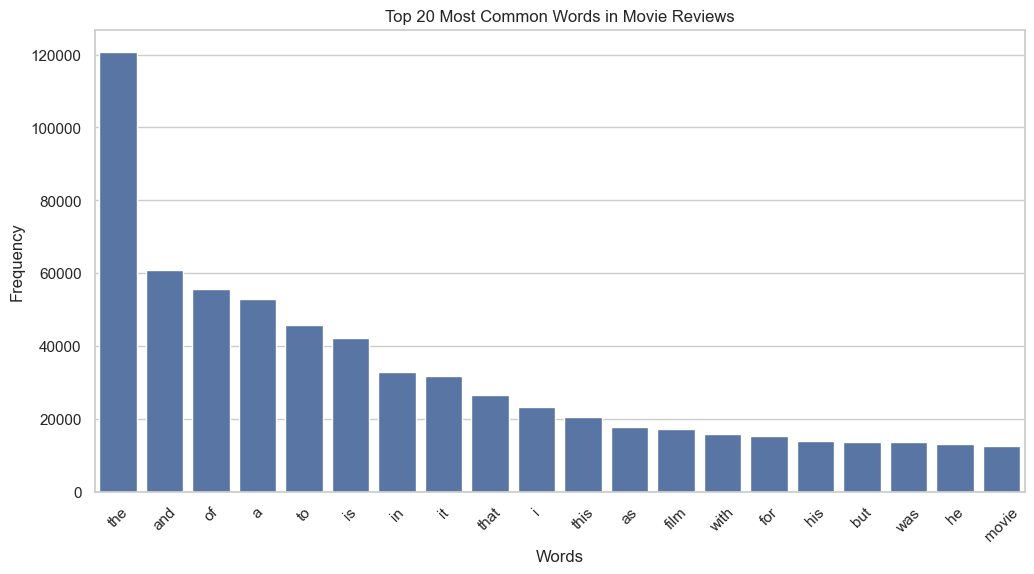

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# https://en.wikipedia.org/wiki/Zipf%27s_law
# Convert the most common words into a DataFrame
most_common_df = pd.DataFrame(most_common_words, columns=['word', 'frequency'])

# Plot the frequency distribution using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='word', y='frequency', data=most_common_df)
plt.title('Top 20 Most Common Words in Movie Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


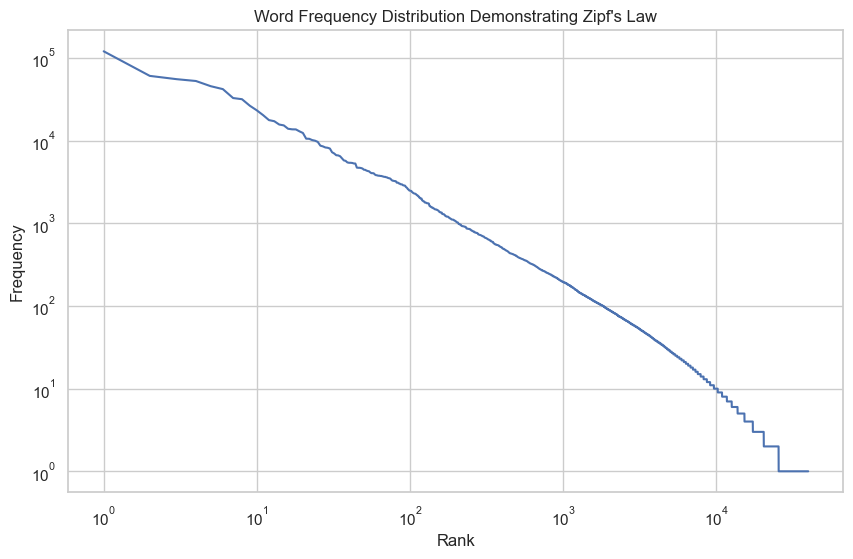

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert frequency distribution to a DataFrame
fdist_df = pd.DataFrame(fdist.most_common(), columns=['word', 'frequency'])

# Plot the frequency distribution
plt.figure(figsize=(10, 6))
sns.lineplot(data=fdist_df, x=fdist_df.index + 1, y='frequency')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('Word Frequency Distribution Demonstrating Zipf\'s Law')
plt.show()

In [36]:
# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis to the review texts
all_reviews_df['sentiment'] = all_reviews_df['review_text'].apply(lambda x: sia.polarity_scores(x))

# Extract compound sentiment scores
all_reviews_df['compound_sentiment'] = all_reviews_df['sentiment'].apply(lambda x: x['compound'])

# Display the dataframe with sentiment scores
all_reviews_df[['review_text', 'compound_sentiment']].head()


,review_text,compound_sentiment
0,Personal Rating: 9/10This movie shattered me. ...,0.9966
1,It was with a sad reason that I re watched Dea...,0.9787
2,Swim against the streamWhat this film did for ...,0.9980
3,There are certain films that get under your sk...,0.9754
4,Dead Poets Scoiety. I suppose if you were in H...,0.9989


In [47]:
# Find the most positive review
most_positive_review = all_reviews_df.loc[all_reviews_df['compound_sentiment'].idxmax()]

# Find the most negative review
most_negative_review = all_reviews_df.loc[all_reviews_df['compound_sentiment'].idxmin()]

# Print the most positive review
print("Most Positive Review:")
print("Review Text:", most_positive_review['review_text'])
print("Compound Sentiment Score:", most_positive_review['compound_sentiment'])
print("Helpful Votes:", most_positive_review['helpful_votes'])
print("Total Votes:", most_positive_review['total_votes'])
print("Movie Star Rating:", most_positive_review['movie_star_rating'])
print()

# Print the most negative review
print("Most Negative Review:")
print("Review Text:", most_negative_review['review_text'])
print("Compound Sentiment Score:", most_negative_review['compound_sentiment'])
print("Helpful Votes:", most_negative_review['helpful_votes'])
print("Total Votes:", most_negative_review['total_votes'])
print("Movie Star Rating:", most_negative_review['movie_star_rating'])


Most Positive Review:
Review Text: LIKES:The Pace For The Most Part
-Comic book movies are an art that requires balance to tell all it has to tell, and Miles' next story.. has A LOT to tell.-It found a good pace for me to tell the story, giving you the character development, but not at a pace that was too slow and lost on itself, for the most part.-Yet, the movie did manage to keep it slow enough that there was real development, build up, hints, and appreciation to age like fine wine.-This dynamic was very impressive to me, keeping an engaging movie for my attention, but not skimping out on the action like some of these deeper movies try to do.-That takes talent in the cooking pot as big as this, building on the past movie, but yet doing its own thing until the end for the setup.The Voice Acting
-Everyone rocks in this movie, and I have to agree with my friend that it is grade A on many levels with what you get in live action movies.-Isaac is still strong as the anti-hero role that he 

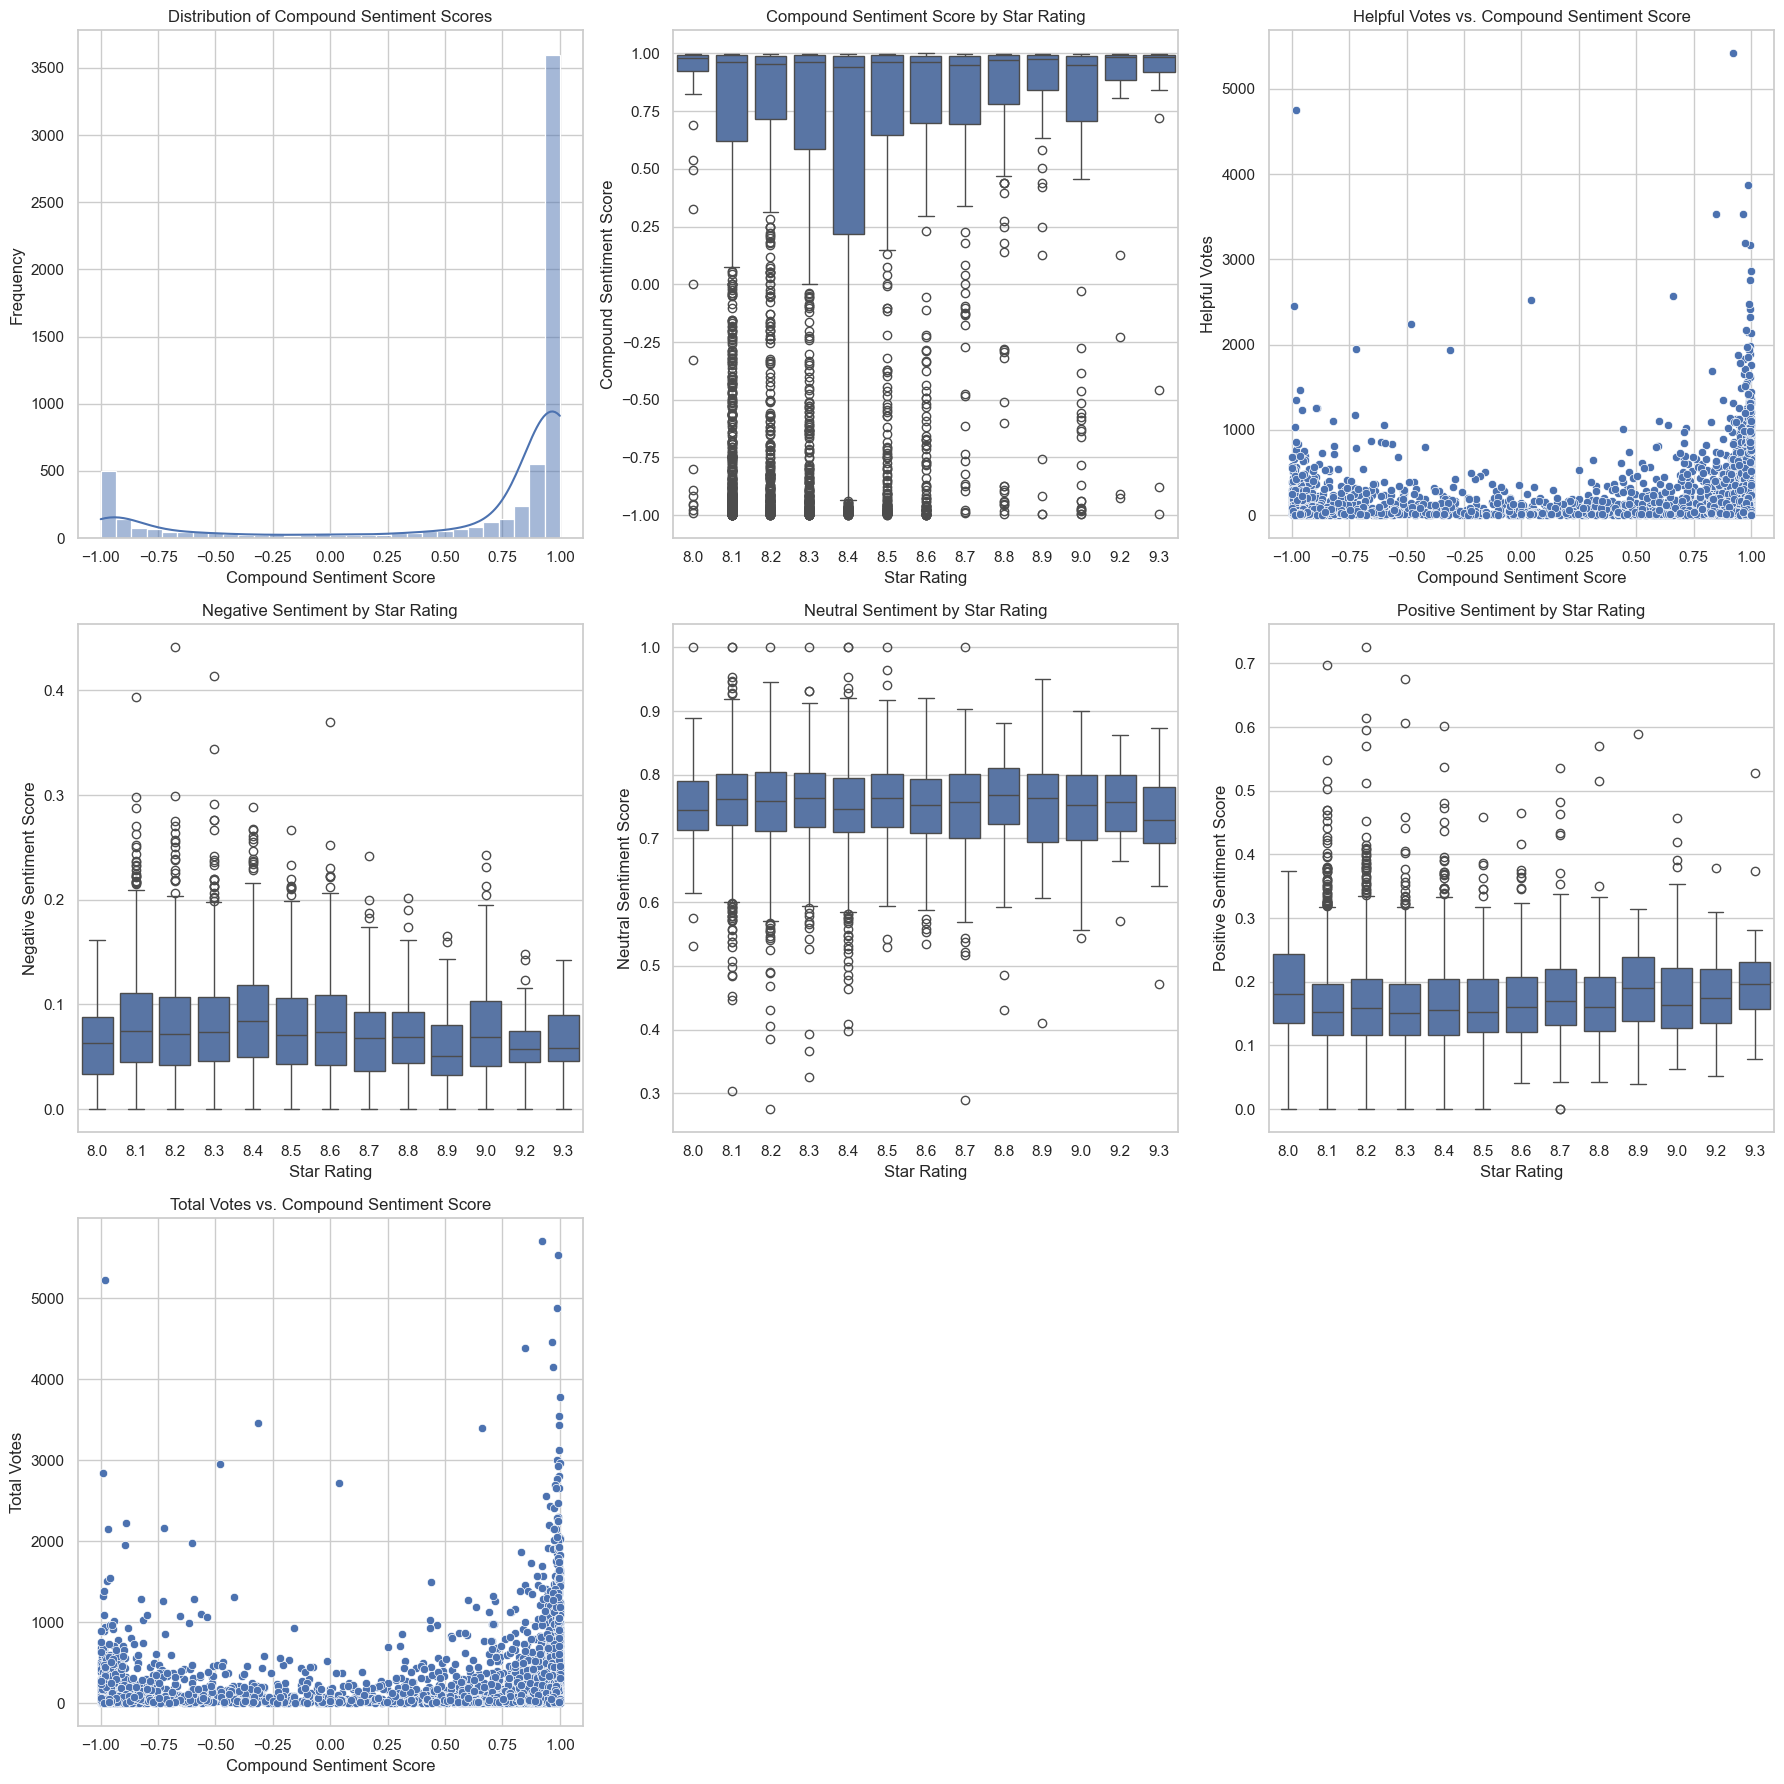

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a figure with subplots
fig, axs = plt.subplots(3, 3, figsize=(18, 18))

# Distribution of Compound Sentiment Scores
sns.histplot(all_reviews_df['compound_sentiment'], bins=30, kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Compound Sentiment Scores')
axs[0, 0].set_xlabel('Compound Sentiment Score')
axs[0, 0].set_ylabel('Frequency')

# Sentiment vs. Star Rating
sns.boxplot(x='movie_star_rating', y='compound_sentiment', data=all_reviews_df, ax=axs[0, 1])
axs[0, 1].set_title('Compound Sentiment Score by Star Rating')
axs[0, 1].set_xlabel('Star Rating')
axs[0, 1].set_ylabel('Compound Sentiment Score')

# Helpful Votes vs. Sentiment
sns.scatterplot(x='compound_sentiment', y='helpful_votes', data=all_reviews_df, ax=axs[0, 2])
axs[0, 2].set_title('Helpful Votes vs. Compound Sentiment Score')
axs[0, 2].set_xlabel('Compound Sentiment Score')
axs[0, 2].set_ylabel('Helpful Votes')

# Sentiment Breakdown by Star Rating - Negative
sentiment_df = all_reviews_df[['movie_star_rating', 'sentiment']].copy()
sentiment_df = sentiment_df.join(pd.json_normalize(sentiment_df['sentiment']))
sentiment_df = sentiment_df.drop(columns=['sentiment'])

sns.boxplot(x='movie_star_rating', y='neg', data=sentiment_df, ax=axs[1, 0])
axs[1, 0].set_title('Negative Sentiment by Star Rating')
axs[1, 0].set_xlabel('Star Rating')
axs[1, 0].set_ylabel('Negative Sentiment Score')

# Sentiment Breakdown by Star Rating - Neutral
sns.boxplot(x='movie_star_rating', y='neu', data=sentiment_df, ax=axs[1, 1])
axs[1, 1].set_title('Neutral Sentiment by Star Rating')
axs[1, 1].set_xlabel('Star Rating')
axs[1, 1].set_ylabel('Neutral Sentiment Score')

# Sentiment Breakdown by Star Rating - Positive
sns.boxplot(x='movie_star_rating', y='pos', data=sentiment_df, ax=axs[1, 2])
axs[1, 2].set_title('Positive Sentiment by Star Rating')
axs[1, 2].set_xlabel('Star Rating')
axs[1, 2].set_ylabel('Positive Sentiment Score')

# Total Votes vs. Sentiment
sns.scatterplot(x='compound_sentiment', y='total_votes', data=all_reviews_df, ax=axs[2, 0])
axs[2, 0].set_title('Total Votes vs. Compound Sentiment Score')
axs[2, 0].set_xlabel('Compound Sentiment Score')
axs[2, 0].set_ylabel('Total Votes')

# Hide empty subplots (if any)
for ax in axs.flat:
    if not ax.has_data():
        ax.axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


In [49]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Preprocess the text data
def preprocess_text(text):
    # Tokenize and remove stopwords
    stop_words = set(stopwords.words('english'))
    words = nltk.word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words and word.isalpha()]
    return ' '.join(filtered_words)

# Apply preprocessing to the review text
all_reviews_df['cleaned_review_text'] = all_reviews_df['review_text'].apply(preprocess_text)

In [50]:
# 2. Create embeddings using TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(all_reviews_df['cleaned_review_text'])

In [51]:
# 3. Dimensionality reduction using t-SNE

# Other similar methods: umap
# https://scikit-learn.org/0.16/modules/manifold.html#manifold
tsne_model = TSNE(n_components=2, random_state=42)
tsne_values = tsne_model.fit_transform(tfidf_matrix.toarray())

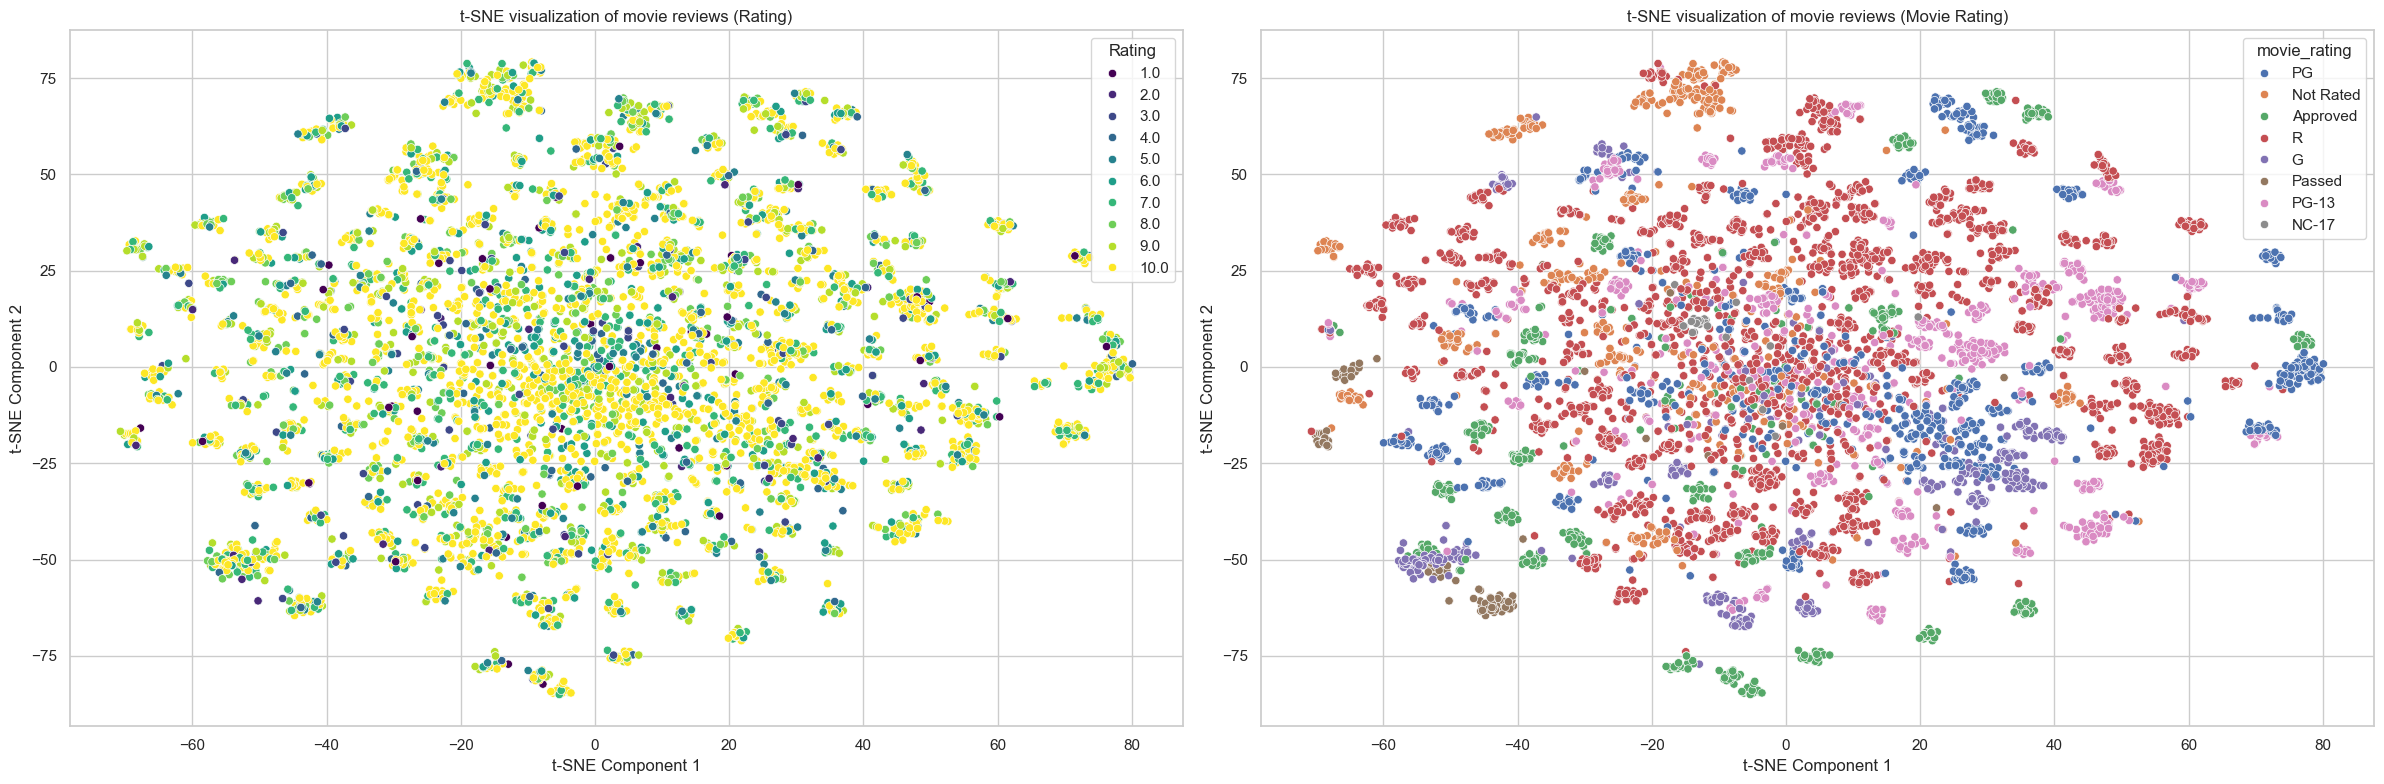

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(24, 8))

# Plot the first subplot
sns.scatterplot(
    x=tsne_values[:, 0],
    y=tsne_values[:, 1],
    hue=all_reviews_df['rating'],
    palette="viridis",
    legend="full",
    ax=axes[0]
)
axes[0].set_title('t-SNE visualization of movie reviews (Rating)')
axes[0].set_xlabel('t-SNE Component 1')
axes[0].set_ylabel('t-SNE Component 2')
axes[0].legend(title='Rating')

# Plot the second subplot
sns.scatterplot(
    x=tsne_values[:, 0],
    y=tsne_values[:, 1],
    hue=all_reviews_df['movie_rating'],
    ax=axes[1]
)
axes[1].set_title('t-SNE visualization of movie reviews (Movie Rating)')
axes[1].set_xlabel('t-SNE Component 1')
axes[1].set_ylabel('t-SNE Component 2')

# Adjust layout
plt.tight_layout()
plt.show()

In [54]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Load the embeddings (assuming you want to use the 512-dimensional embeddings)
embeddings = np.load('review_embeddings_original.npy')

In [55]:
# Ensure the number of reviews matches the number of embeddings
assert len(all_reviews_df) == embeddings.shape[0], "Mismatch between number of reviews and embeddings"

# Apply t-SNE to reduce the dimensionality to 2 dimensions for visualization
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

# Add the 2D embeddings to the dataframe
all_reviews_df['tsne_2d_x'] = embeddings_2d[:, 0]
all_reviews_df['tsne_2d_y'] = embeddings_2d[:, 1]

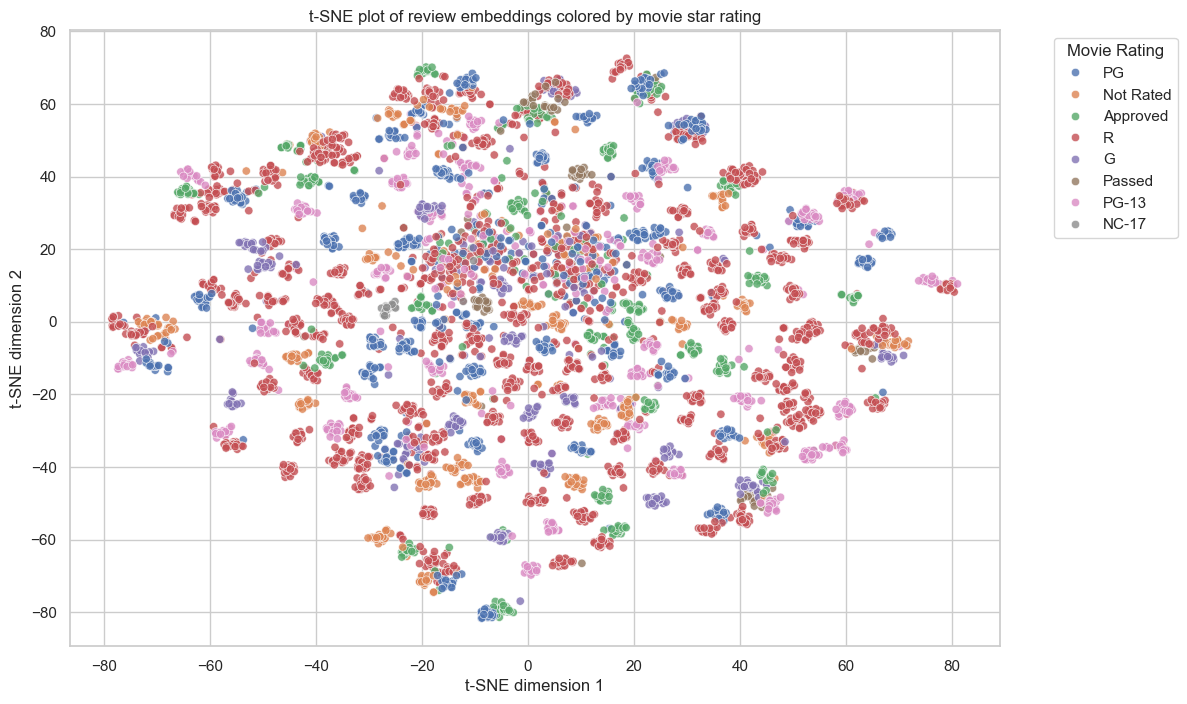

In [56]:
# Plot the t-SNE results
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='tsne_2d_x', y='tsne_2d_y',
    # hue='compound_sentiment',
    hue='movie_rating',
    # hue='movie_title',
    # palette=sns.color_palette("coolwarm", as_cmap=True),
    data=all_reviews_df,
    # legend='full',
    alpha=0.8
)
plt.title('t-SNE plot of review embeddings colored by movie star rating')
plt.xlabel('t-SNE dimension 1')
plt.ylabel('t-SNE dimension 2')
plt.legend(title='Movie Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
